### Question 1
Performance of various gradient operators (total 40 points): <br>

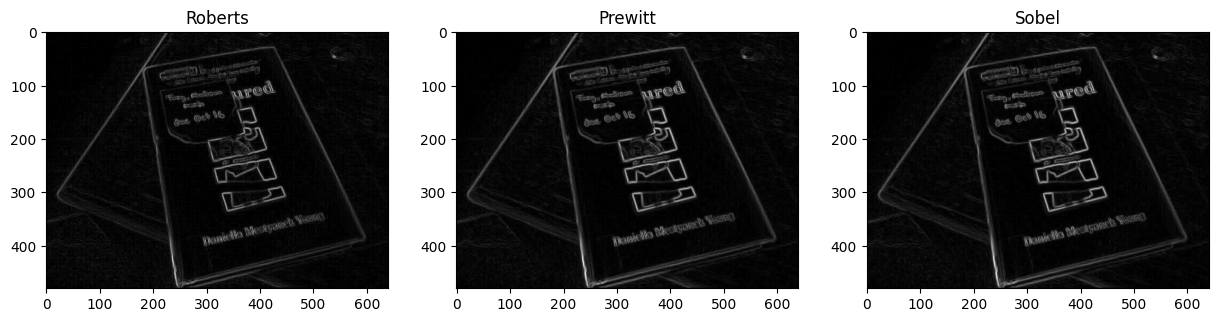

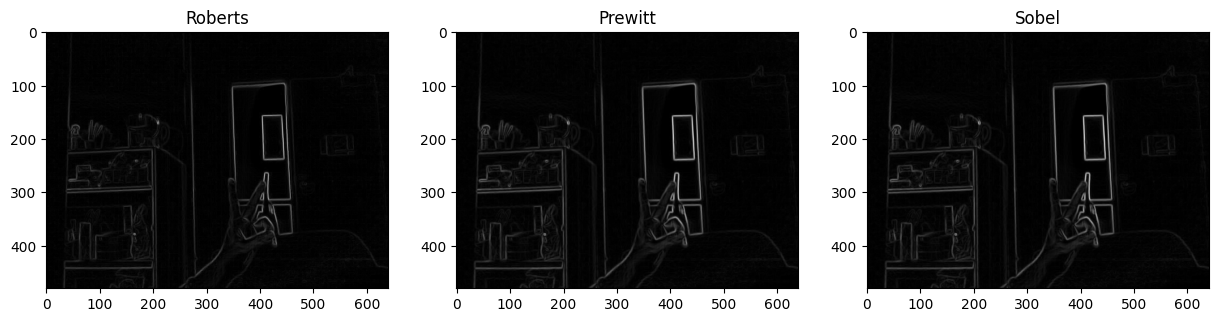

In [87]:
"""
Apply the following gradient operators to them using inbuilt MATLAB or
Python function ('edge’'function in MATLAB): (10 points)

i. Roberts
ii. Prewitt
iii. Sobel
"""
import cv2 as cv
from skimage import filters, data, io
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=[15,15])
img1 = cv.imread("book.jpg", cv.IMREAD_GRAYSCALE)

# Roberts:
edges_clean_roberts1 = filters.roberts(img1)
ax[0].imshow(edges_clean_roberts1, cmap="gray")
ax[0].title.set_text("Roberts")

# Prewitt:
edges_clean_prewitt1 = filters.prewitt(img1)
ax[1].imshow(edges_clean_prewitt1, cmap="gray")
ax[1].title.set_text("Prewitt")

# Sobel:
edges_clean_sobel1 = filters.sobel(img1)
ax[2].imshow(edges_clean_sobel1, cmap="gray")
ax[2].title.set_text("Sobel")


fig, ax = plt.subplots(1, 3, figsize=[15,15])
img2 = cv.imread("low_res_2.jpg", cv.IMREAD_GRAYSCALE)
# Roberts:
edges_clean_roberts2 = filters.roberts(img2)
ax[0].imshow(edges_clean_roberts2, cmap="gray")
ax[0].title.set_text("Roberts")

# Prewitt:
edges_clean_prewitt2 = filters.prewitt(img2)
ax[1].imshow(edges_clean_prewitt2, cmap="gray")
ax[1].title.set_text("Prewitt")

# Sobel:
edges_clean_sobel2 = filters.sobel(img2)
ax[2].imshow(edges_clean_sobel2, cmap="gray")
ax[2].title.set_text("Sobel")

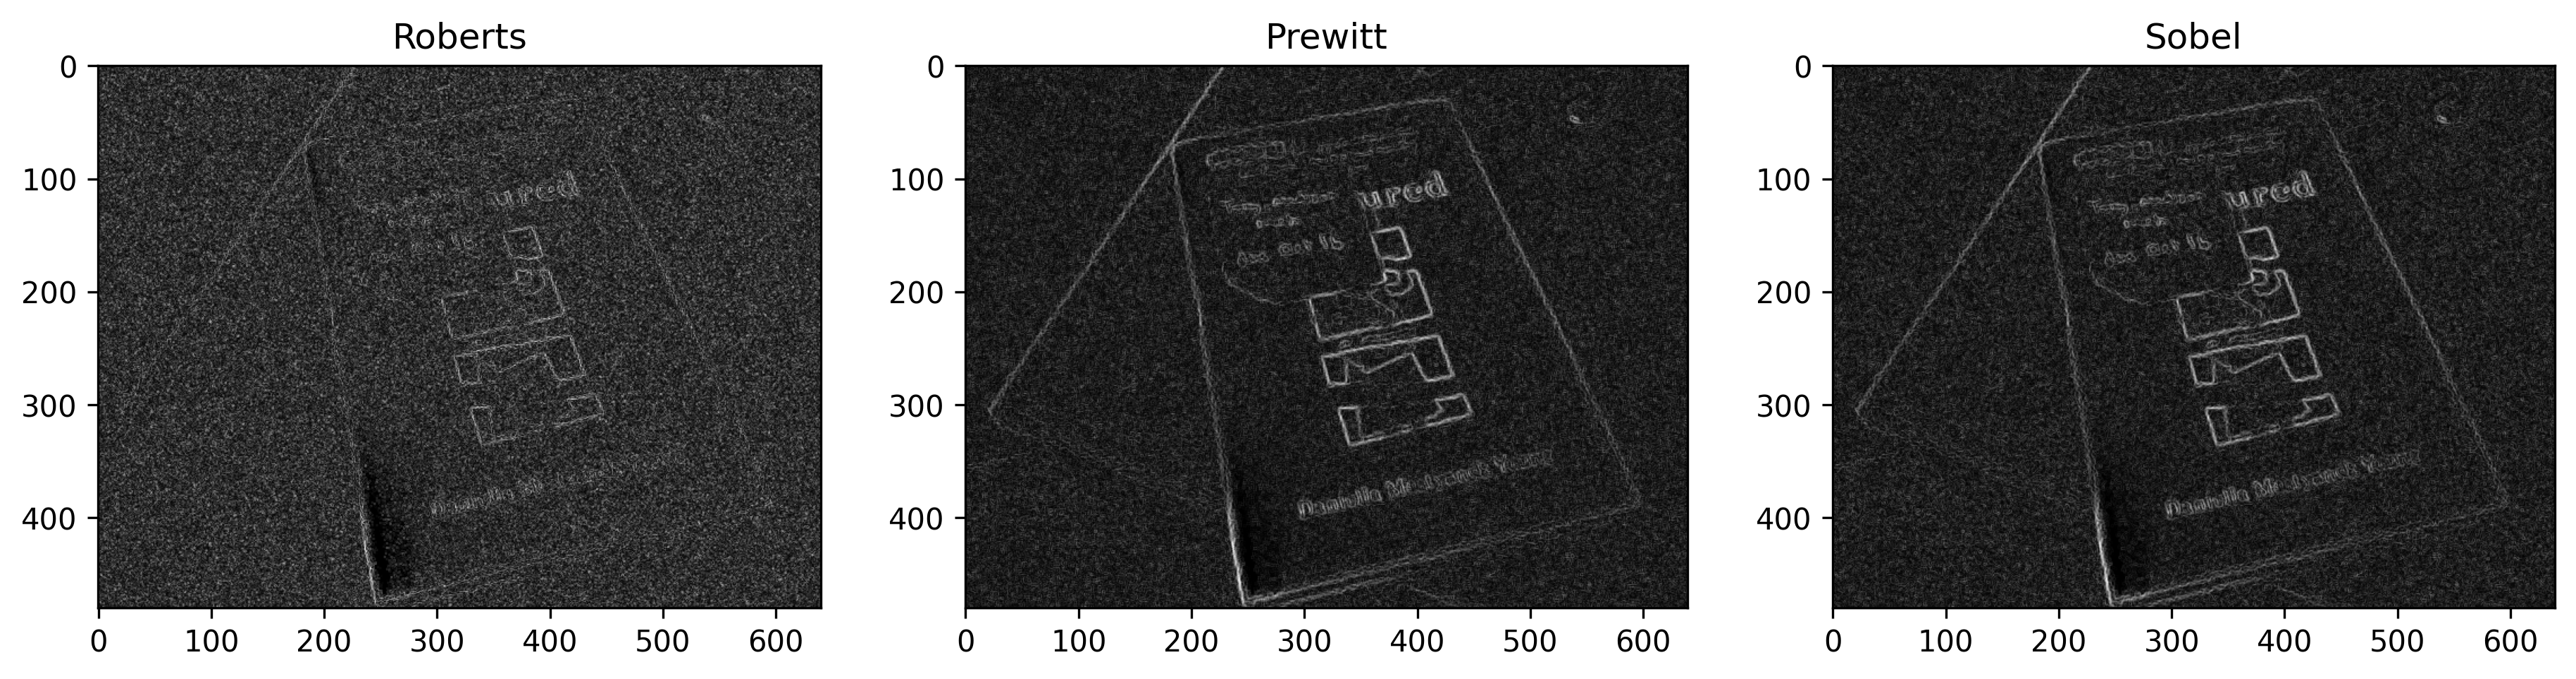

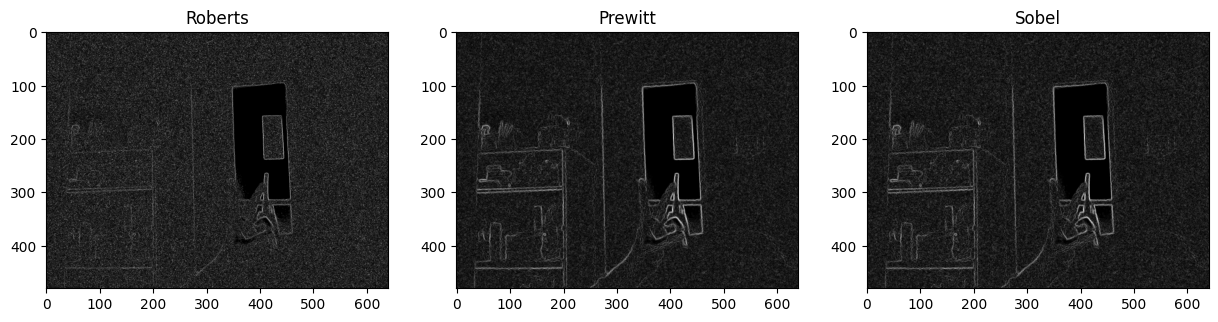

In [83]:
"""
Add noise to each of the two images and now apply the three operators
above to the images
"""
import numpy as np

img1 = cv.imread("book.jpg", 0)
img2 = cv.imread('low_res_2.jpg',0)

# gauss noise
gauss_noise = np.zeros((480, 640),dtype=np.uint8)
cv.randn(gauss_noise, 128, 20)
gauss_noise = (gauss_noise * 0.5).astype(np.uint8)
gn_img1 = cv.add(img1,gauss_noise)
gn_img2 = cv.add(img2,gauss_noise)

fig, ax = plt.subplots(1, 3, figsize=[15,15], dpi=300)

# Roberts:
edges_roberts1 = filters.roberts(gn_img1)
ax[0].imshow(edges_roberts1, cmap="gray")
ax[0].title.set_text("Roberts")

# Prewitt:
edges_prewitt1 = filters.prewitt(gn_img1)
ax[1].imshow(edges_prewitt1, cmap="gray")
ax[1].title.set_text("Prewitt")

# Sobel:
edges_sobel1 = filters.sobel(gn_img1)
ax[2].imshow(edges_sobel1, cmap="gray")
ax[2].title.set_text("Sobel")

fig, ax = plt.subplots(1, 3, figsize=[15,15])

# Roberts:
edges_roberts2 = filters.roberts(gn_img2)
ax[0].imshow(edges_roberts2, cmap="gray")
ax[0].title.set_text("Roberts")

# Prewitt:
edges_prewitt2 = filters.prewitt(gn_img2)
ax[1].imshow(edges_prewitt2, cmap="gray")
ax[1].title.set_text("Prewitt")

# Sobel:
edges_sobel2 = filters.sobel(gn_img2)
ax[2].imshow(edges_sobel2, cmap="gray")
ax[2].title.set_text("Sobel")

Without noise, the Roberts operator seems to be slightly duller but they operate at about the same levels, as seen in the first code segment. However, when noise is added, the Robets operator is significantly worse than the other two. Between Prewitt and Sobel, the quality seems to be about the same. 

### Question 2
Some from-scratch coding 

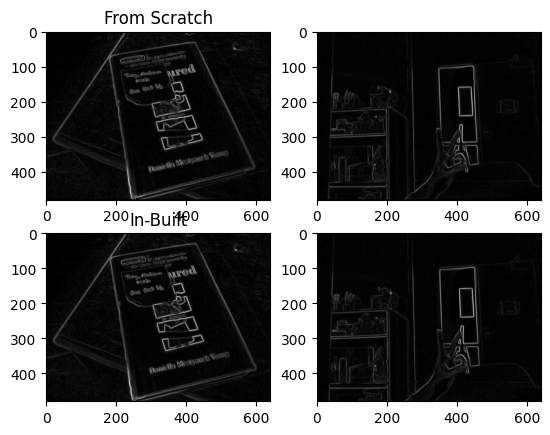

In [91]:
"""
Write your own code to apply the 3x3 Sobel gradient operator to one of the
images.
"""

fig, (ax1, ax2) = plt.subplots(2, 2)
img1 = cv.imread("book.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("low_res_2.jpg", cv.IMREAD_GRAYSCALE)

def SobelFilter(img1):
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # Copy kernels from pdf
    Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    shape = np.shape(img1)
    filtered_img = np.zeros(shape=shape)

    for i in range(shape[0] - 2):
        for j in range(shape[1] - 2):
            sx = np.sum(np.multiply(Sx, img1[i:i+3, j:j+3])) # multiply 2 matrices
            sy = np.sum(np.multiply(Sy, img1[i:i+3, j:j+3])) # multiply 2 matrices
            filtered_img[i, j] = np.sqrt(sx **2 + sy ** 2) # place magnitude into new img

    return filtered_img

filtered1 = SobelFilter(img1)
filtered2 = SobelFilter(img2)


ax1[0].imshow(filtered1, cmap="gray")
ax1[1].imshow(filtered2, cmap="gray")
ax1[0].title.set_text("From Scratch")

ax2[0].imshow(edges_clean_sobel1, cmap="gray")
ax2[1].imshow(edges_clean_sobel2, cmap="gray")
ax2[0].title.set_text("In-Built")


My filter is a bit worse than the built in one because the edges detected are slightly more blurred. This is evident in the image above, where the inbuilt Sobel operator is plotted against mine. However, this different isn't too much.